### Import of recquired libraries

In [1]:
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage as ski
from skimage import transform
from scipy.optimize import curve_fit

### Load data

In [2]:
file_t1w = r"C:\Users\leali\Documents\5_Semester\Billed_dannelse\Billeddannelse\3D_T1w_20240920074836_A7B7.nii.gz"
file_t2w = r"C:\Users\leali\Documents\5_Semester\Billed_dannelse\Billeddannelse\3D_T2w_20240920074836_A7B7.nii.gz"

t1_img = nib.load(file_t1w)
t2_img = nib.load(file_t2w)

t1_data = t1_img.get_fdata()
t2_data = t2_img.get_fdata()

### Visualize object

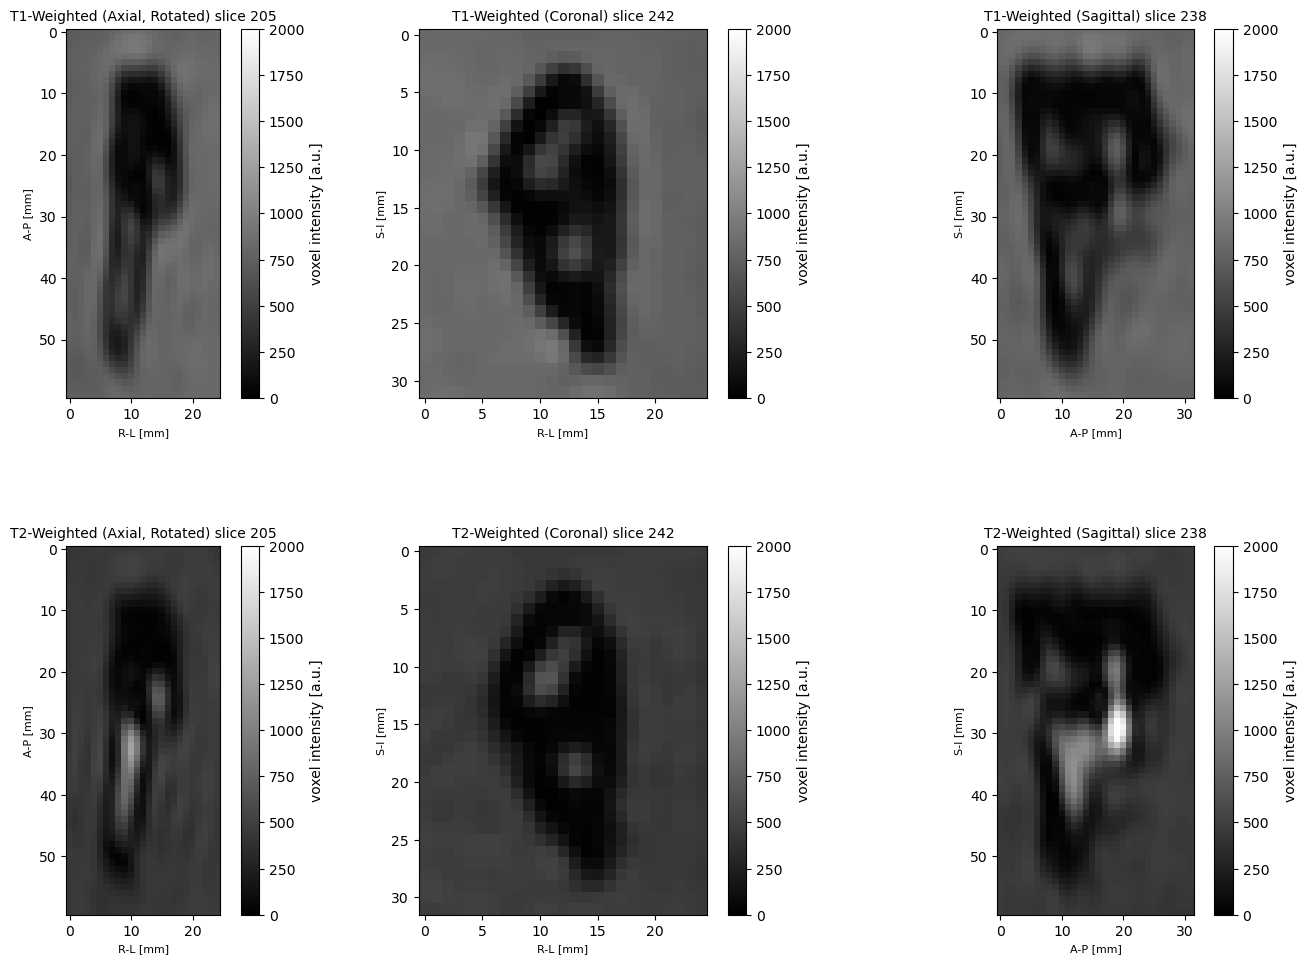

In [262]:
t1w = np.flipud(np.fliplr(t1_data))
t2w = np.flipud(np.fliplr(t2_data))

axial_idx = 205  # 512 i alt # 205 tand
coronal_idx = 242  # 512 i alt #256 start
sagittal_idx = 238 # 256 i alt # start 180 #238 tand

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("T1-Weighted (Axial, Rotated) slice 205",fontsize=10)
rotated_t1_axial = transform.rotate(t1w[225:250, 225:285, axial_idx], 270, resize=True)
fig1 = plt.imshow(rotated_t1_axial, cmap="gray",vmin=0, vmax=2000)
plt.xlabel('R-L [mm]',fontsize=8)
plt.ylabel('A-P [mm]',fontsize=8)
plt.colorbar(fig1,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

plt.subplot(2, 3, 2)
plt.title("T1-Weighted (Coronal) slice 242",fontsize=10)
fig2 = plt.imshow(t1w[225:250, coronal_idx, 190:222].T, cmap="gray",vmin=0, vmax=2000)
plt.ylabel('S-I [mm]',fontsize=8)
plt.xlabel('R-L [mm]',fontsize=8)
plt.colorbar(fig2,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

plt.subplot(2, 3, 3)
plt.title("T1-Weighted (Sagittal) slice 238",fontsize=10)
rotated_t1_sagittal = ski.transform.rotate(t1w[sagittal_idx,225:285,190:222], 0, resize = True)
fig3 = plt.imshow(rotated_t1_sagittal, cmap="gray",vmin=0, vmax=2000)
plt.ylabel('S-I [mm]',fontsize=8)
plt.xlabel('A-P [mm]',fontsize=8)
plt.colorbar(fig3,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

plt.subplot(2, 3, 4)
plt.title("T2-Weighted (Axial, Rotated) slice 205",fontsize=10)
rotated_t2_axial = ski.transform.rotate(t2w[225:250, 225:285, axial_idx], 270, resize=True)
fig4 = plt.imshow(rotated_t2_axial, cmap="gray",vmin=0, vmax=2000)
plt.xlabel('R-L [mm]',fontsize=8)
plt.ylabel('A-P [mm]',fontsize=8)
plt.colorbar(fig4,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

plt.subplot(2, 3, 5)
plt.title("T2-Weighted (Coronal) slice 242",fontsize=10)
fig5 = plt.imshow(t2w[225:250, coronal_idx, 190:222].T, cmap="gray",vmin=0, vmax=2000)
plt.ylabel('S-I [mm]',fontsize=8)
plt.xlabel('R-L [mm]',fontsize=8)
plt.colorbar(fig5,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

plt.subplot(2, 3, 6)
plt.title("T2-Weighted (Sagittal) slice 238",fontsize=10)
rotated_t2_sagittal = ski.transform.rotate(t2w[sagittal_idx, 225:285, 190:222], 0, resize=True)
fig6 = plt.imshow(rotated_t2_sagittal, cmap="gray",vmin=0, vmax=2000)
plt.ylabel('S-I [mm]',fontsize=8)
plt.xlabel('A-P [mm]',fontsize=8)
plt.colorbar(fig6,fraction=0.05,pad=0.05,label="voxel intensity [a.u.]")

# Adjust layout
plt.tight_layout(pad=2.0)  # Adjust padding for better spacing
plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Fine-tune space between subplots
plt.show()



### Measurements

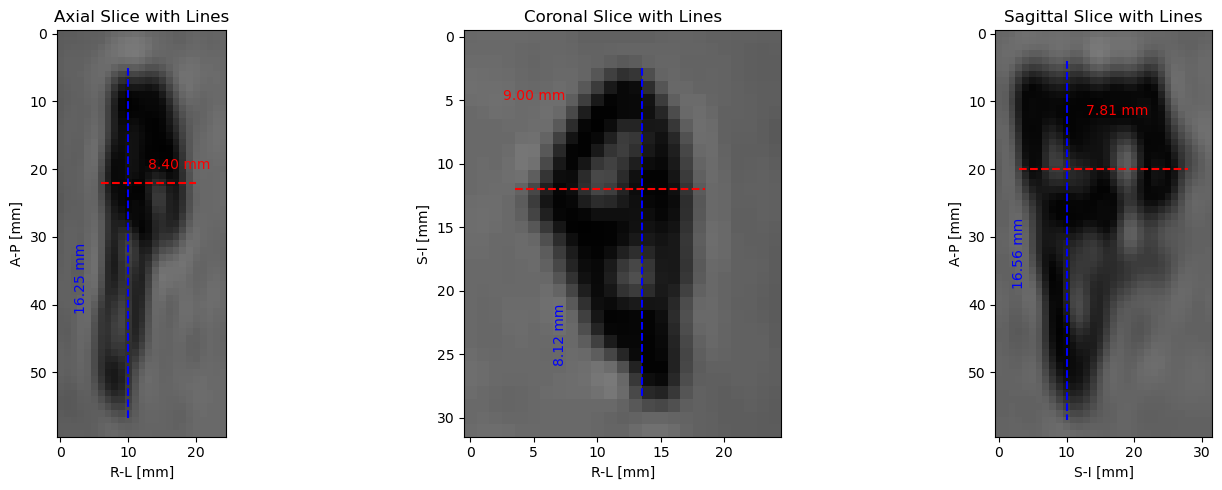

In [318]:
# Get voxel dimensions (in mm)
voxel_dimensions = t1_img.header.get_zooms()[:3]  # (x, y, z)

# Definer slices og subregioner
axial_idx = 205
coronal_idx = 242
sagittal_idx = 238

# Definer linjekoordinater for hver slice
horizontal_start_axial = (6, 22)
horizontal_end_axial = (20, 22)
vertical_start_axial = (10, 5)
vertical_end_axial = (10, 57)

horizontal_start_coronal = (3.5, 12)
horizontal_end_coronal = (18.5, 12)
vertical_start_coronal = (13.5, 2.5)
vertical_end_coronal = (13.5, 28.5)

horizontal_start_sagittal = (3, 20)
horizontal_end_sagittal = (28, 20)
vertical_start_sagittal = (10, 4)
vertical_end_sagittal = (10, 57)

# Opret figuren og subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice
axial_slice = transform.rotate(t1w[225:250, 225:285, axial_idx], 270, resize=True)
axes[0].imshow(axial_slice, cmap="gray", vmin=0, vmax=2000)
axes[0].set_title("Axial Slice with Lines")
axes[0].set_xlabel("R-L [mm]")
axes[0].set_ylabel("A-P [mm]")
# Tilføj linjer og annoteringer
axes[0].plot([horizontal_start_axial[0], horizontal_end_axial[0]], 
             [horizontal_start_axial[1], horizontal_end_axial[1]], 
             color="red", linestyle="--", linewidth=1.5)
axes[0].plot([vertical_start_axial[0], vertical_end_axial[0]], 
             [vertical_start_axial[1], vertical_end_axial[1]], 
             color="blue", linestyle="--", linewidth=1.5)
# Beregn og vis længder
h_length_axial = np.sqrt((horizontal_end_axial[0] - horizontal_start_axial[0])**2) * voxel_dimensions[0]
v_length_axial = np.sqrt((vertical_end_axial[1] - vertical_start_axial[1])**2) * voxel_dimensions[1]
axes[0].text(((horizontal_start_axial[0] + horizontal_end_axial[0]) / 2), (horizontal_start_axial[1] - 10)+8, 
             f"{h_length_axial:.2f} mm", color="red", fontsize=10)
axes[0].text((vertical_start_axial[0] - 10)+2, ((vertical_start_axial[1] + vertical_end_axial[1]) / 2)+10, 
             f"{v_length_axial:.2f} mm", color="blue", fontsize=10, rotation=90)

# Coronal slice
coronal_slice = t1w[225:250, coronal_idx, 190:222].T
axes[1].imshow(coronal_slice, cmap="gray", vmin=0, vmax=2000)
axes[1].set_title("Coronal Slice with Lines")
axes[1].set_xlabel("R-L [mm]")
axes[1].set_ylabel("S-I [mm]")
# Tilføj linjer og annoteringer
axes[1].plot([horizontal_start_coronal[0], horizontal_end_coronal[0]], 
             [horizontal_start_coronal[1], horizontal_end_coronal[1]], 
             color="red", linestyle="--", linewidth=1.5)
axes[1].plot([vertical_start_coronal[0], vertical_end_coronal[0]], 
             [vertical_start_coronal[1], vertical_end_coronal[1]], 
             color="blue", linestyle="--", linewidth=1.5)
# Beregn og vis længder
h_length_coronal = np.sqrt((horizontal_end_coronal[0] - horizontal_start_coronal[0])**2) * voxel_dimensions[0]
v_length_coronal = np.sqrt((vertical_end_coronal[1] - vertical_start_coronal[1])**2) * voxel_dimensions[2]
axes[1].text(((horizontal_start_coronal[0] + horizontal_end_coronal[0]) / 2)-6, horizontal_start_coronal[1] - 7, 
             f"{h_length_coronal:.2f} mm", color="red", fontsize=10, ha="center")
axes[1].text((vertical_start_coronal[0] - 10)+3, ((vertical_start_coronal[1] + vertical_end_coronal[1]) / 2)+8, 
             f"{v_length_coronal:.2f} mm", color="blue", fontsize=10, rotation=90, va="center")

# Sagittal slice
sagittal_slice = ski.transform.rotate(t1w[sagittal_idx, 225:285, 190:222], 0, resize=True)
axes[2].imshow(sagittal_slice, cmap="gray", vmin=0, vmax=2000)
axes[2].set_title("Sagittal Slice with Lines")
axes[2].set_xlabel("S-I [mm]")
axes[2].set_ylabel("A-P [mm]")
# Tilføj linjer og annoteringer
axes[2].plot([horizontal_start_sagittal[0], horizontal_end_sagittal[0]], 
             [horizontal_start_sagittal[1], horizontal_end_sagittal[1]], 
             color="red", linestyle="--", linewidth=1.5)
axes[2].plot([vertical_start_sagittal[0], vertical_end_sagittal[0]], 
             [vertical_start_sagittal[1], vertical_end_sagittal[1]], 
             color="blue", linestyle="--", linewidth=1.5)
# Beregn og vis længder
h_length_sagittal = np.sqrt((horizontal_end_sagittal[0] - horizontal_start_sagittal[0])**2) * voxel_dimensions[1]
v_length_sagittal = np.sqrt((vertical_end_sagittal[1] - vertical_start_sagittal[1])**2) * voxel_dimensions[2]
axes[2].text(((horizontal_start_sagittal[0] + horizontal_end_sagittal[0]) / 2)+2, (horizontal_start_sagittal[1] - 10)+2, 
             f"{h_length_sagittal:.2f} mm", color="red", fontsize=10, ha="center")
axes[2].text((vertical_start_sagittal[0] - 10)+2, ((vertical_start_sagittal[1] + vertical_end_sagittal[1]) / 2)+2, 
             f"{v_length_sagittal:.2f} mm", color="blue", fontsize=10, rotation=90, va="center")

# Juster layout og vis figuren
plt.tight_layout()
plt.show()

### Intensity profiles through phantom



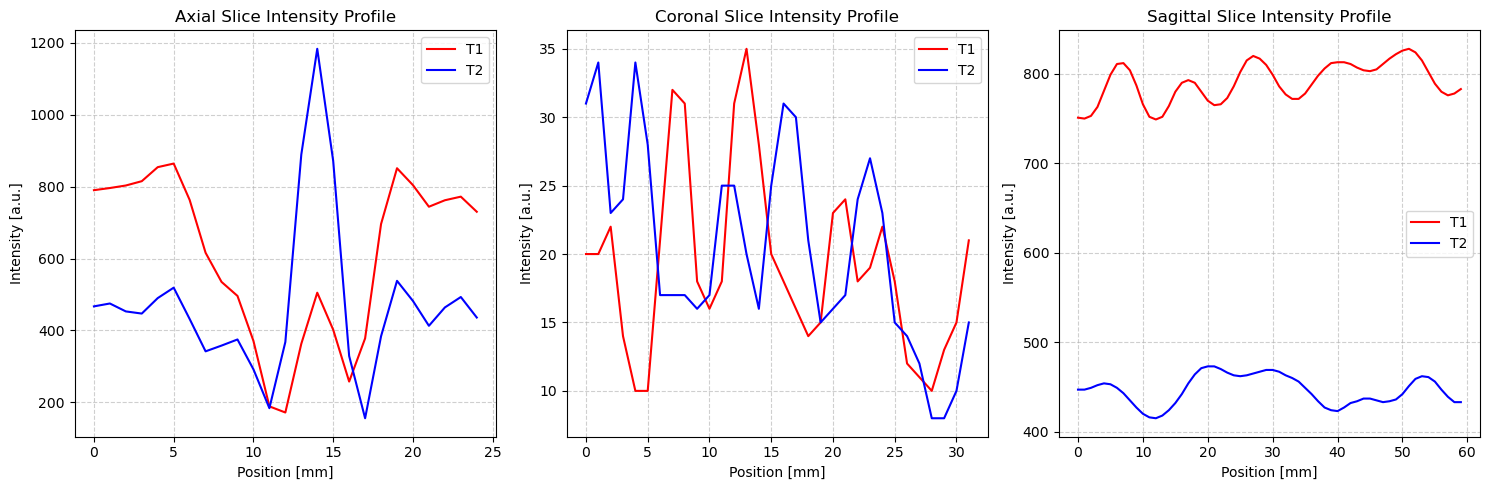

In [320]:
# Slice-indeks
axial_idx = 205
coronal_idx = 242
sagittal_idx = 238


# Udtræk intensitetsprofiler
# Axial profile: midtpunkt i y-retning
center_y_axial = t1w.shape[1] // 2
profile_axial_t1 = t1w[225:250, center_y_axial, axial_idx]
profile_axial_t2 = t2w[225:250, center_y_axial, axial_idx]

# Coronal profile: midtpunkt i x-retning
center_x_coronal = t1w.shape[0] // 2
profile_coronal_t1 = t1w[center_x_coronal, coronal_idx, 190:222]
profile_coronal_t2 = t2w[center_x_coronal, coronal_idx, 190:222]

# Sagittal profile: midtpunkt i z-retning
center_z_sagittal = t1w.shape[2] // 2
profile_sagittal_t1 = t1w[sagittal_idx, 225:285, center_z_sagittal]
profile_sagittal_t2 = t2w[sagittal_idx, 225:285, center_z_sagittal]

# Plot intensitetsprofiler i subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial profile
axes[0].plot(profile_axial_t1, label="T1", color="red")
axes[0].plot(profile_axial_t2, label="T2", color="blue")
axes[0].set_title("Axial Slice Intensity Profile")
axes[0].set_xlabel("Position [mm]")
axes[0].set_ylabel("Intensity [a.u.]")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Coronal profile
axes[1].plot(profile_coronal_t1, label="T1", color="red")
axes[1].plot(profile_coronal_t2, label="T2", color="blue")
axes[1].set_title("Coronal Slice Intensity Profile")
axes[1].set_xlabel("Position [mm]")
axes[1].set_ylabel("Intensity [a.u.]")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Sagittal profile
axes[2].plot(profile_sagittal_t1, label="T1", color="red")
axes[2].plot(profile_sagittal_t2, label="T2", color="blue")
axes[2].set_title("Sagittal Slice Intensity Profile")
axes[2].set_xlabel("Position [mm]")
axes[2].set_ylabel("Intensity [a.u.]")
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.6)

# Juster layout
plt.tight_layout()
plt.show()
